# **Groceries Market Basket Analysis**

# **Pendahuluan**

## Latar Belakang Permasalahan

Latar belakang permasalahan dari deskripsi di atas berkaitan dengan kebutuhan para pengecer besar untuk memahami pola pembelian konsumen guna meningkatkan strategi penjualan. **Market Basket Analysis (Analisis Keranjang Belanja)** adalah teknik utama yang digunakan dalam data transaksi untuk mengungkapkan asosiasi antara barang-barang yang sering dibeli bersama. Pengecer ingin menemukan hubungan kuat antara barang yang dibeli secara bersamaan agar dapat meningkatkan penawaran, seperti menyusun penempatan produk, promosi, atau paket penjualan.

Melalui **Association Rule Mining**, pengecer dapat menemukan aturan asosiasi yang membantu mereka mengidentifikasi tren umum dan mengungkap pola konsumsi. Sebagai contoh, mengetahui bahwa pelanggan yang membeli produk A juga sering membeli produk B bisa memandu pengecer untuk membuat strategi yang lebih efektif, misalnya dalam hal penawaran bundling atau diskon.

Algoritma seperti **Apriori** digunakan untuk melakukan analisis ini. Algoritma ini membantu menemukan **itemset-itemset yang sering muncul** dalam data transaksi dan menghasilkan aturan asosiasi berdasarkan **support**, **confidence**, dan **lift**.

Oleh karena itu, latar belakang permasalahannya adalah bagaimana menggunakan data transaksi dari toko grosir untuk menemukan pola pembelian yang berulang, guna menghasilkan aturan-aturan asosiasi yang kuat. Dengan menerapkan teknik Market Basket Analysis dan algoritma Apriori, pengecer dapat secara efektif mengidentifikasi hubungan antar produk, yang pada akhirnya dapat meningkatkan keputusan bisnis yang berbasis data.

Permasalahan ini mencakup bagaimana mengolah sejumlah besar data transaksi untuk menemukan asosiasi produk yang bermakna, sehingga dapat dimanfaatkan untuk strategi bisnis yang lebih baik.

Dataset ini mencakup transaksi pembelian dari toko grosir. Ini adalah dataset yang sering digunakan untuk demonstrasi algoritma Apriori untuk mengidentifikasi asosiasi pembelian produk. Akan dianalisis pola pembelian pelanggan di data ini [ Groceries, https://www.kaggle.com/heeraldedhia/groceries-dataset ].


## Ukuran data, jumlah pengukuran (kolom data), skala/tipe data

```
# Ukuran data
len(df)
```




Ukuran data yang diperoleh adalah 38765

```
# Jumlah pengukuran (kolom data)
len(df.columns)
```

Sedangkan banyaknya kolom berjumlah 3 dengan rincian sebagai berikut:
1. Nomor Member atau ```Member_number```
2. Tanggal atau ```Date```
3. Deskripsi barang atau ```itemDescription```


```
# Skala/tipe data
print(df.dtypes)
```

Skala atau tipe data setelah pre-processing dari masing-masing variabel penjelas sebelumnya adalah:
1. Member_number -> integer (```int64```)
2. Date -> Tanggal -> waktu (```datetime```)
3. itemDescription -> kategorik (```object```)


## Tujuan

Tujuan dari permasalahan ini adalah untuk **menemukan pola pembelian** dan **menghasilkan aturan asosiasi** antara produk-produk yang sering dibeli bersama dalam data transaksi, guna membantu pengecer dalam:

1. **Mengidentifikasi hubungan antar produk**: Menemukan kombinasi produk yang sering dibeli bersama oleh pelanggan, sehingga pengecer dapat memahami perilaku belanja konsumen.

2. **Meningkatkan strategi penjualan**: Dengan menemukan pola pembelian, pengecer dapat membuat keputusan yang lebih baik dalam hal **penempatan produk**, **promosi**, atau **pemasaran yang terarah** (misalnya, menyarankan produk tambahan yang relevan saat pelanggan menambah produk ke keranjang belanja).

3. **Mengoptimalkan penawaran bundling**: Pengecer bisa menggabungkan produk yang sering dibeli bersama dalam satu paket untuk mendorong penjualan lebih lanjut.

4. **Meningkatkan pengalaman pelanggan**: Dengan menawarkan rekomendasi produk yang lebih relevan berdasarkan pola pembelian, pengecer dapat meningkatkan kepuasan pelanggan.

5. **Membuat keputusan bisnis berbasis data**: Hasil dari Market Basket Analysis dapat memberikan wawasan yang mendalam dan akurat kepada pengecer untuk mengatur stok, mengelola inventaris, dan meningkatkan efisiensi operasional.

Secara keseluruhan, tujuan utamanya adalah **menggunakan data transaksi untuk mendukung strategi bisnis yang lebih baik dan berbasis data**, yang dapat meningkatkan penjualan dan memberikan nilai tambah bagi pelanggan.


#**Pre-processing**

## Import Package

Kami mengimpor package yang diperlukan untuk proses data mining

In [ ]:
!pip install mlxtend
!pip install pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import textwrap
import math
import csv
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.6 MB/s eta 0:00:00
   ━━━

## Import Data set

Dataset yang di*upload* berupa file CSV berisi data mengenai kebutuhan sehari-hari (groceries). Setelah itu, dataset ini disimpan ke dalam deskripsi df untuk dianalisis lebih lanjut.

In [ ]:
!gdown 1ZNWX5tHMECjhMzxX-B8k-hrOIIyiHJKM
# https://drive.google.com/file/d/1ZNWX5tHMECjhMzxX-B8k-hrOIIyiHJKM/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1ZNWX5tHMECjhMzxX-B8k-hrOIIyiHJKM
To: /content/Groceries_dataset.csv
100% 1.10M/1.10M [00:00<00:00, 84.3MB/s]


In [ ]:
# Import data pada link gdrive
df = pd.read_csv('/content/Groceries_dataset.csv', encoding='latin-1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Informasi Data

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Dataset ini dataset memiliki 38.765 baris dan 3 variabel.

Berikut adalah deskripsi dari ketiga variabel yang ditampilkan:

* Member_number: Variabel ini merepresentasikan ID unik dari pelanggan. Setiap pelanggan diberi nomor ID yang berbeda untuk mengidentifikasi transaksi yang dilakukan oleh pelanggan tersebut. Variabel ini memiliki rentang nilai dari 1000 hingga 5000, menunjukkan jumlah pelanggan terlibat dalam data.

* Date: Variabel ini merepresentasikan tanggal pembelian. Ini mencatat kapan sebuah transaksi dilakukan.

* itemDescription: Variabel ini berisi deskripsi produk yang dibeli dalam setiap transaksi. Setiap item yang dibeli oleh pelanggan dicatat dengan nama spesifiknya.

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Berikut adalah tipe dari ketiga variabel yang ditampilkan:

* Member_number: integer

* Date: object

* itemDescription: object

## Pengecekan NaN dan Penyesuaian Tipe Data

Kami membersihkan dan memformat data agar lebih siap digunakan dalam analisis.

* Pertama, dicek apakah ada nilai NaN (kosong) di dalam dataset, dan hasilnya
 menunjukkan bahwa tidak ada nilai kosong.
* Lalu, tipe data pada kolom Date diubah menjadi format datetime, agar dapat diproses lebih lanjut dalam analisis berbasis waktu.
* Selanjutnya, dilakukan normalisasi pada kolom itemDescription dengan mengubah seluruh huruf menjadi huruf kecil, guna menjaga konsistensi dalam penamaan item dan menghindari perbedaan yang disebabkan oleh kapitalisasi.
* Tidak dilakukan analisis dari persebaran data dengan boxplot karena pada data asli tidak menunjukkan kuantitas apapun.

In [ ]:
#Mengecek jumlah NaN yang ada
df.isna().sum().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
#Mengubah tipe variabel 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-7a436caf4ce9>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [ ]:
#Mengubah seluruh huruf menjadi kecil untuk konsistensi
df['itemDescription'] = df['itemDescription'].str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **EDA**

## 10 Item dengan Penjualan Terbanyak

Akan dilihat produk apa yang memiliki penjualan tertinggi.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


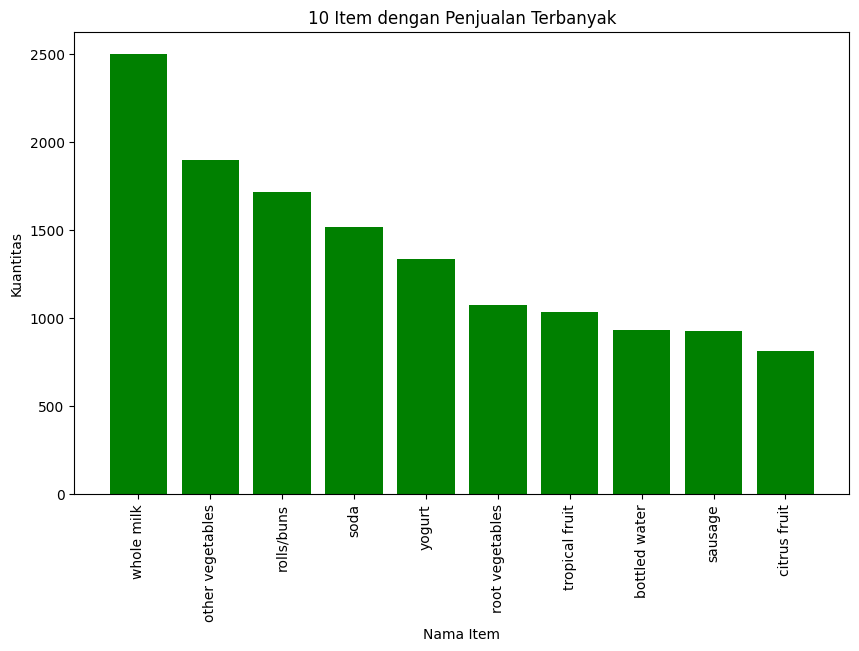

In [ ]:
Item_sold = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

#Mendeskripsikan variabel tiap sumbu
bars = Item_sold["itemDescription"]
height = Item_sold["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(10,6))
plt.bar(x_pos, height, color= 'green')

plt.title("10 Item dengan Penjualan Terbanyak")
plt.xlabel("Nama Item")
plt.ylabel("Kuantitas")

plt.xticks(x_pos, bars, rotation=90)

plt.show()

Grafik di atas menunjukkan 10 item dengan penjualan terbanyak. Item dengan penjualan tertinggi adalah whole milk, diikuti oleh other vegetables dan rolls/buns. Secara keseluruhan, item-item seperti susu, sayuran, roti, dan minuman seperti soda mendominasi penjualan, menunjukkan preferensi pelanggan terhadap produk makanan dan minuman harian.

## Rata-rata Kedatangan Pengunjung Harian

Akan dilihat rata-rata kedatangan pengujung pada setiap hari yang berbeda.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


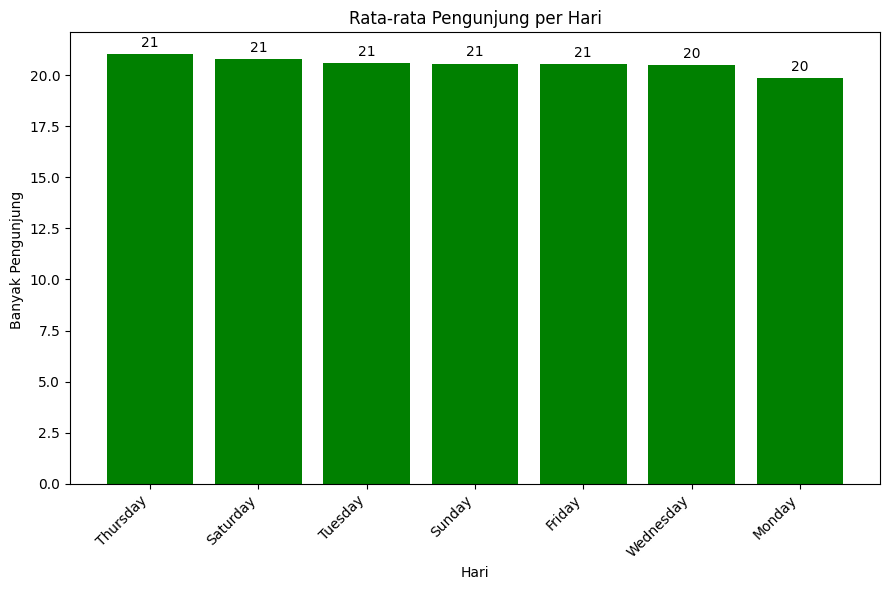

In [ ]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah member unik per tanggal
daily_unique_customers = df.groupby(df['Date'].dt.date)['Member_number'].nunique()

# Mengubah index daily_unique_customers menjadi DatetimeIndex
daily_unique_customers.index = pd.to_datetime(daily_unique_customers.index)

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata jumlah member unik per hari
daily_customers = daily_unique_customers.groupby(daily_unique_customers.index.day_name()).mean().sort_values(ascending=False)


# Membuat plot batang
plt.figure(figsize=(9, 6))
bars = plt.bar(daily_customers.index, daily_customers.values, color='green')
plt.title('Rata-rata Pengunjung per Hari')
plt.xlabel('Hari')
plt.ylabel('Banyak Pengunjung ')
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.01, int(round(yval)),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa tingkat kunjungan *groceries store* memiliki jumlah pengunjung yang cukup konsisten dari hari ke hari, yaitu sebanyak 20 pengunjung. Tidak ada hari tertentu yang secara signifikan lebih ramai atau sepi dibandingkan hari lainnya.

## Total Barang Terjual per Bulan *Time Series*

Menggunakan *time series* data dari total barang terjual digambarkan pada grafik per bulan pada Januari 2014 hingga Desember 2015.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


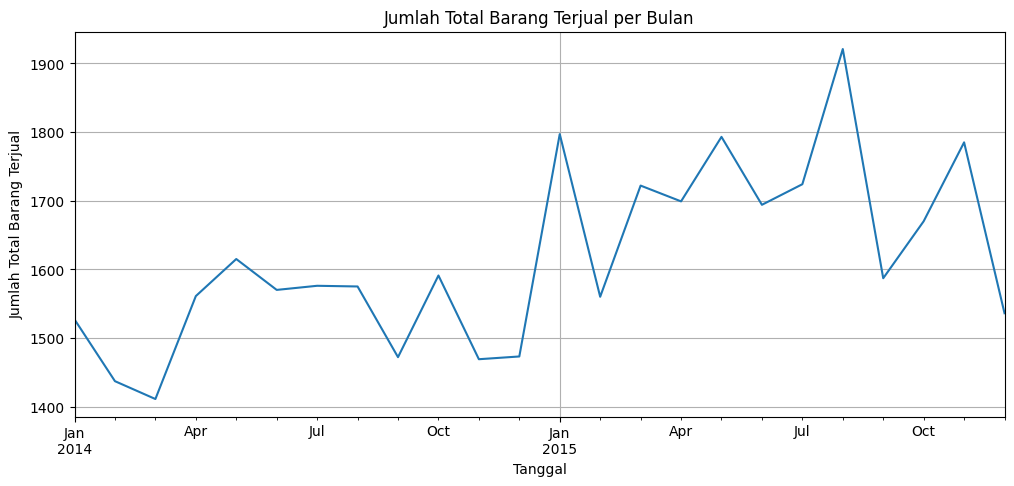

In [ ]:
# Mengatur 'Date' sebagai index
df_ts = df.set_index('Date')

# Resampling data per bulan dan menghitung jumlah itemDescription
# 'M' is used for calendar month end frequency
monthly_sales = df_ts.resample("M")['itemDescription'].count()

# Membuat plot
monthly_sales.plot(figsize=(12,5), grid=True, title="Jumlah Total Barang Terjual per Bulan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Total Barang Terjual")
plt.show()

Grafik garis di atas menunjukkan fluktuasi jumlah total barang yang terjual setiap bulannya dalam kurun waktu dua tahun, yaitu dari Januari 2014 hingga Oktober 2015.

* Tren Umum: Secara umum, jumlah penjualan barang mengalami fluktuasi yang cukup signifikan dari bulan ke bulan. Tidak terlihat adanya tren kenaikan atau penurunan yang konsisten sepanjang periode yang ditampilkan.
* Puncak Penjualan: Terdapat beberapa puncak penjualan yang cukup tinggi, terutama pada pertengahan tahun 2015. Ini mengindikasikan adanya faktor-faktor tertentu (seperti musim, promosi, atau event khusus) yang mendorong peningkatan penjualan pada periode-periode tersebut.
* Penurunan Penjualan: Sebaliknya, terdapat juga beberapa bulan di mana terjadi penurunan penjualan yang cukup tajam, seperti pada tahun 2015 bulan Februari dan bulan September.

# **Penyesuaian Struktur Data**

### Penambahan kolom 'Kuantitas'

Membuat kolom 'Kuantitas' dan mengisinya dengan nilai 1 untuk setiap baris. Langkah ini berfokus pada keberadaan item dalam transaksi, bukan jumlahnya. Oleh karena itu, kita memberi nilai 1 untuk setiap kemunculan item.

In [ ]:
# Membuat kolom 'Kuantitas' dengan nilai default 1 untuk setiap item
df['Kuantitas'] = np.full_like(df['itemDescription'], 1, dtype=int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Penambahan kolom 'ID_Transaksi'

Menggabungkan 'Member_number' dan 'Date' untuk membuat ID yang unik bagi setiap transaksi. Data distruktur sesuai dengan pelanggan yang melakukan transaksi pada hari pembelian yang sama. Ini berarti semua pembelian yang dilakukan oleh pelanggan yang sama pada hari yang sama akan dikelompokkan menjadi satu transaksi.

In [ ]:
# Membuat kolom 'ID_Transaksi' yang unik untuk setiap transaksi
df['ID_Transaksi'] = df['Member_number'].astype(str) + '-' + df['Date'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Membuat basket produk
Menggunakan pivot table untuk mengubah data menjadi format yang sesuai untuk ***Market basket Analysis* (MBA)**.

In [ ]:
# Membuat "basket" atau keranjang produk menggunakan pivot table
basket = pd.pivot_table(df, values='Kuantitas', index='ID_Transaksi',
                        columns='itemDescription', aggfunc='sum', fill_value=0)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
ID_Transaksi,,,,,,,,,,,,,,,,,,,,,
1000-2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000-2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000-2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000-2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000-2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dapat dilihat pada tabel bahwa setiap baris mewakili satu transaksi (ID_Transaksi), setiap kolom mewakili satu produk, dan nilai dalam sel menunjukkan jumlah produk yang dibeli dalam transaksi tersebut.

Semua item yang dibeli oleh pelanggan yang sama pada hari yang sama akan muncul dalam satu baris tabel pivot.

## Encoding nilai dalam 'basket'

Mengubah semua nilai positif menjadi 1 dan mempertahankan 0. Tujuannya adalah untuk mengubah data kuantitatif menjadi data biner (ada/tidak ada) yang lebih sesuai untuk market basket analysis.

In [ ]:
# Fungsi untuk encoding nilai dalam basket
def encode(x):
    return 1 if x >= 1 else 0

# Encoding nilai dalam basket
basket = basket.applymap(encode)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-23cbbc0de631>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode)


## Filter transaksi

Filter dataset agar hanya menyertakan transaksi dengan 2 atau lebih item. Pada MBA, kita tertarik pada asosiasi antar item, yang hanya bermakna jika ada setidaknya dua item dalam transaksi.

In [ ]:
# Filter transaksi yang memiliki 2 atau lebih produk
basket = basket[(basket > 0).sum(axis=1) >= 2]

# Menampilkan hasil
print("Hasil Persiapan Data untuk Market Basket Analysis:")
print(basket.head())

Hasil Persiapan Data untuk Market Basket Analysis:
itemDescription  abrasive cleaner  artif. sweetener  baby cosmetics  bags  \
ID_Transaksi                                                                
1000-2014-06-24                 0                 0               0     0   
1000-2015-03-15                 0                 0               0     0   
1000-2015-05-27                 0                 0               0     0   
1000-2015-07-24                 0                 0               0     0   
1000-2015-11-25                 0                 0               0     0   

itemDescription  baking powder  bathroom cleaner  beef  berries  beverages  \
ID_Transaksi                                                                 
1000-2014-06-24              0                 0     0        0          0   
1000-2015-03-15              0                 0     0        0          0   
1000-2015-05-27              0                 0     0        0          0   
1000-2015-07-24    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pada kenyataanya *output* di atas harusnya memanjang pada 167 kolom namun karena bentuknya *layout* -nya tidak memungkinkan maka terlihat seperti dibagi-bagi.

## Menyimpan data

Data yang sudah *cleaned* tidak memiliki NaN, konsisten pada format huruf kecil, terstruktur berdasarkan transaksi, dan terfilter pada transaksi 2 atau lebih item.

In [ ]:
# Menyimpan hasil ke file CSV
basket.to_csv('Basket.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**MBA**

Memanggil ulang data yang sudah *cleaned*

In [ ]:
basket = pd.read_csv('Basket.csv', index_col=0)
basket.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 14758 entries, 1000-2014-06-24 to 5000-2015-02-10
Columns: 167 entries, abrasive cleaner to zwieback
dtypes: int64(167)
memory usage: 18.9+ MB


Terdapat 14758 transaksi dan 167 item barang yang dijual.

## Apriori Algoritm

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
3,0.157406,(whole milk)
0,0.122510,(other vegetables)
1,0.109906,(rolls/buns)
2,0.097371,(soda)
4,0.086055,(yogurt)


Menggunakan fungsi apriori untuk menentukan *frequent_itemsets* atau himpunan item yang sering muncul pada dataset basket. Ditetapkan bahwa 0.7 sebagai minimum *support* agar item bisa disebut sering muncul atau itemset perlu dibeli sekitar 7% dari total transaksi.

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Terlihat hanya sedikit item yang muncul dengan nilai *min_support* 0.07 dan tidak ada *rules* yang terbentuk, maka akan dicoba dengan nilai *min_support* yang lebih kecil yaitu 0.005 dan menurunkan *lift* menjadi 2.



---


Keterangan:

Sebelum memilih nilai *min_support* 0.005 ini, sudah dicoba menggunakan nilai 0.05, 0.01, 0.0009 namun tidak mendapatkan aturan asosiasi apapun.

In [ ]:
frequent_itemsetsb = apriori(basket, min_support=0.005, use_colnames=True)
frequent_itemsetsb.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsetsb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
88,0.157406,(whole milk)
53,0.122510,(other vegetables)
66,0.109906,(rolls/buns)
75,0.097371,(soda)
89,0.086055,(yogurt)
...,...,...
45,0.005082,(mayonnaise)
19,0.005014,(cling film/bags)
109,0.005014,"(rolls/buns, pip fruit)"
99,0.005014,"(pip fruit, other vegetables)"


In [ ]:
rulesb = association_rules(frequent_itemsetsb, metric="lift", min_threshold=1)
rulesb.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rulesb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(frankfurter),(other vegetables),0.038284,0.122510,0.005218,0.136283,1.112427,0.000527,1.015947,0.105087
7,(other vegetables),(frankfurter),0.122510,0.038284,0.005218,0.042588,1.112427,0.000527,1.004496,0.115174
4,(yogurt),(sausage),0.086055,0.061052,0.005827,0.067717,1.109168,0.000574,1.007149,0.107691
5,(sausage),(yogurt),0.061052,0.086055,0.005827,0.095450,1.109168,0.000574,1.010386,0.104823
2,(soda),(sausage),0.097371,0.061052,0.006031,0.061935,1.014462,0.000086,1.000941,0.015794
3,(sausage),(soda),0.061052,0.097371,0.006031,0.098779,1.014462,0.000086,1.001563,0.015183
0,(whole milk),(bottled beer),0.157406,0.045670,0.007250,0.046061,1.008561,0.000062,1.000410,0.010074
1,(bottled beer),(whole milk),0.045670,0.157406,0.007250,0.158754,1.008561,0.000062,1.001602,0.008895


Karena nilai *lift* lebih dari 1 maka sudah dipastikan asosiasi memiliki arah positif sehingga tidak perlu lagi *filtering* untuk membedakan asosiasi yang negatif.

Proses di atas menghasilkan aturan asosiasi dari 'frequent_itemset' dengan metrik *lift* pada batas minimum 1 agar aturan dihasilkan signifikan. Berikut adalah penjelasan dari istilah *rules* yang ada


1.   **antecedentes**: Item atau himpunan item yang mendahului (antecedent) dalam aturan asosiasi.
2.   **consequents**: Item atau himpunan item yang mengikuti (consequent) dalam aturan asosiasi.
3.   **antecedent support**: Proporsi transaksi yang mengandung item antecedent.
4.   **consequent support**: Proporsi transaksi yang mengandung item consequent.
5.   **support**: Proporsi transaksi yang mengandung item antecedent dan consequent.
6.   **confidence**: Seberapa sering item consequent muncul dalam transaksi yang juga mengandung item antecedent (support / antecedent support).
7. **lift**: Seberapa kuat asosiasi antara antecedent dan consequent (support / (antecedent support * consequent support)). Nilai lift > 1 menunjukkan asosiasi positif.
8. **leverage**: Perbedaan antara support yang diamati dan support yang diharapkan jika antecedent dan consequent independen (support - (antecedent support * consequent support)).
10. **conviction**: Seberapa tergantung consequent pada antecedent ((1 - consequent support) / (1 - confidence)). Nilai conviction > 1 menunjukkan dependensi yang kuat.
11. **zhangs_metric**: Metrik lain untuk mengevaluasi kekuatan aturan asosiasi.

## Association Network

Dari hasil asosiasi yang terbentuk dibuatlah network untuk memudahkan interpretasi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


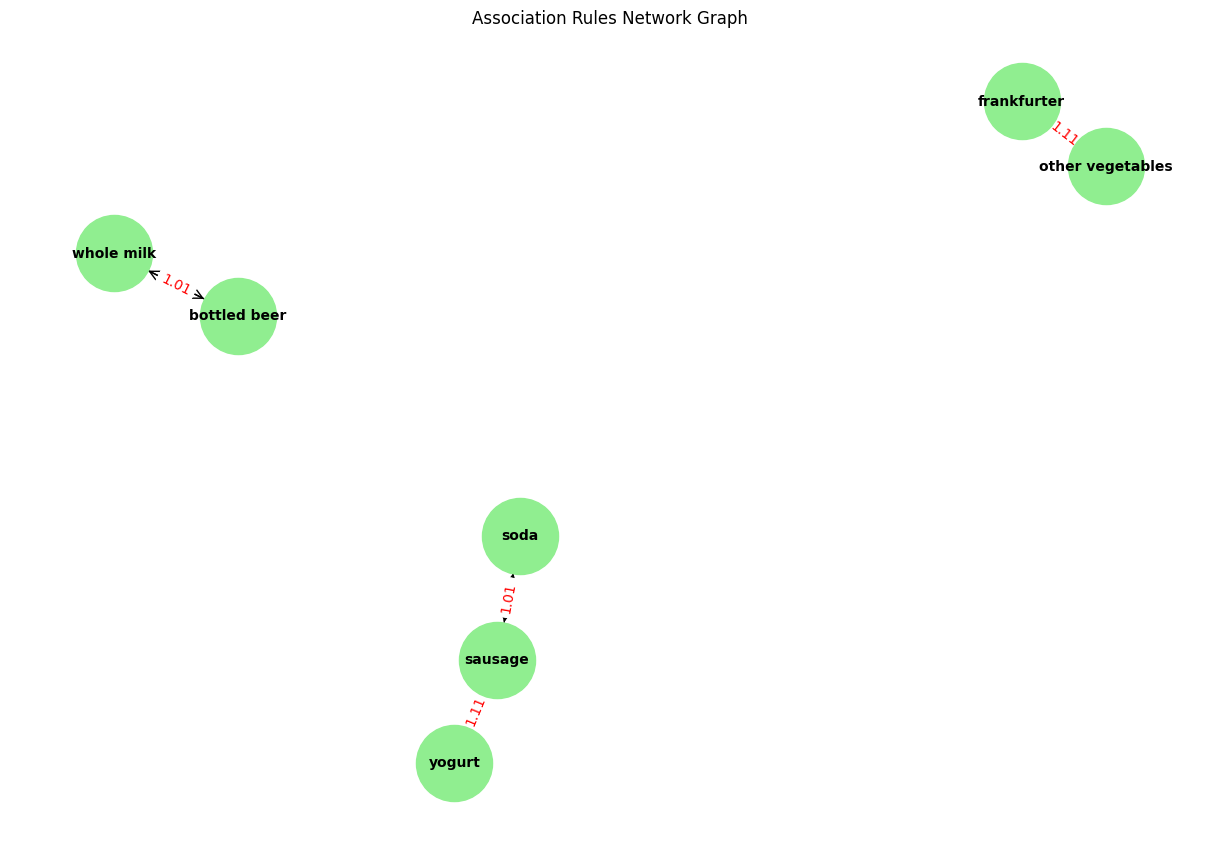

In [ ]:
def create_association_network(rules, threshold=1):
    G = nx.DiGraph()

    # Adding edges with lift as weight
    for index, row in rules.iterrows():
        antecedent = ', '.join(row['antecedents'])  # Convert tuple to string
        consequent = ', '.join(row['consequents'])  # Convert tuple to string
        lift = row['lift']

        if lift >= threshold:
            G.add_edge(antecedent, consequent, weight=lift)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)  # Layout for better positioning
    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}  # Format the lift value

    # Drawing the network graph
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10, font_weight='bold',
            arrows=True, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title('Association Rules Network Graph')
    plt.show()

# Use the function as before
create_association_network(rulesb)

1. Frankfurter dan Other Vegetables:

  Lift = 1.11: Nilai lift ini menunjukkan adanya asosiasi positif yang sedikit antara pembelian frankfurter dan other vegetables. Ketika pelanggan membeli frankfurter, mereka sedikit lebih cenderung juga membeli other vegetables dibandingkan secara acak.

2. Sosis, Soda, dan Yogurt:

  Lift ≈ 1.01 - 1.11: Rantai asosiasi antara sosis, soda, dan yogurt menunjukkan bahwa item-item ini sering muncul bersama dalam transaksi, meskipun hubungan mereka relatif lemah seperti yang diindikasikan oleh nilai lift yang rendah.
Asosiasi antara sosis dan yogurt adalah yang terkuat di antara ketiganya, dengan lift sebesar 1.11.

3. Whole Milk dan Bottled Beer:

  Lift ≈ 1.01: Ini menunjukkan adanya asosiasi yang lemah namun positif antara pelanggan yang membeli whole milk dan bottled beer. Mereka sedikit lebih mungkin muncul bersama dalam transaksi dibandingkan secara acak.

Ada tiga kelompok yang berbeda:
* Satu kelompok di sekitar whole milk dan bottled beer.
* Kelompok lain di sekitar frankfurter dan other vegetables.
* Kelompok yang lebih besar melibatkan soda, sosis, dan yogurt.
Kelompok-kelompok ini menunjukkan bahwa pasangan atau kelompok item-item ini memiliki hubungan yang lebih kuat dalam dataset ini.

# **Interpretasi dan Rekomendasi**

## Interpretasi

Interpretasi dari beberapa aturan asosiasi yang dihasilkan:

1. **Jika pelanggan membeli frankfurter, maka mereka cenderung juga membeli other vegetables.**

* Support (0.005): Sekitar 0.5% dari total transaksi mengandung frankfurter dan other vegetables.
* Confidence (0.1363): Sekitar 13.63% transaksi dari pelanggan yang membeli frankfurter, juga membeli other vegetables.
* Lift (1.1124): Asosiasi antara frankfurter dan other vegetables adalah 1.11 kali lebih kuat daripada jika kedua item tersebut dibeli secara independen. Nilai lift > 1 menunjukkan adanya asosiasi yang positif.
* Kesimpulan: Ada hubungan yang lemah namun positif antara pembelian frankfurter dan sayuran lainnya. Untuk mendorong pembelian bersama, produk ini bisa ditempatkan berdekatan atau menawarkan promosi bersama.

2. **Jika pelanggan membeli other vegetables, maka mereka cenderung juga membeli frankfurter.**

* Support (0.005): Sekitar 0.5% dari total transaksi mengandung both items.
* Confidence (0.0426): Sekitar 4.26% transaksi dari pelanggan yang membeli sayuran lain juga membeli frankfurter.
* Lift (1.1124): Asosiasi antara sayuran lainnya dan frankfurter adalah 1.11 kali lebih kuat dibandingkan pembelian independen.
* Kesimpulan: Hubungan ini juga lemah, namun dapat dimanfaatkan dengan promosi berbasis bundling sayuran dan frankfurter.

3. **Jika pelanggan membeli yogurt, maka mereka cenderung juga membeli sausage.**

* Support (0.0058): Sekitar 0.58% dari total transaksi mengandung both items.
* Confidence (0.0677): Sekitar 6.77% transaksi dari pelanggan yang membeli yogurt, juga membeli sausage.
* Lift (1.1092): Asosiasi antara yogurt dan sausage adalah 1.11 kali lebih kuat daripada jika keduanya dibeli secara independen.
* Kesimpulan: Terdapat asosiasi yang lemah antara yogurt dan sosis, namun dapat dikembangkan menjadi strategi penempatan produk atau promosi untuk meningkatkan penjualan.

4. **Jika pelanggan membeli whole milk, maka mereka cenderung juga membeli bottled beer.**

* Support (0.0058): Sekitar 0.58% dari total transaksi mengandung both items.
* Confidence (0.0406): Sekitar 4.06% transaksi dari pelanggan yang membeli whole milk, juga membeli bottled beer.
* Lift (1.0086): Hubungan antara kedua produk ini hampir independen dengan lift mendekati 1.
* Kesimpulan: Tidak ada hubungan yang signifikan antara pembelian susu segar dan bir botolan. Strategi pemasaran gabungan untuk kedua produk ini mungkin tidak efektif.

5. **Jika pelanggan membeli sausage, maka mereka cenderung juga membeli yogurt.**

* Support (0.006): Sekitar 0.6% dari total transaksi mengandung both items.
* Confidence (0.0955): Sekitar 9.55% transaksi dari pelanggan yang membeli sausage, juga membeli yogurt.
* Lift (1.1092): Asosiasi antara sausage dan yogurt adalah 1.11 kali lebih kuat dibandingkan jika kedua item tersebut dibeli secara independen.
* Kesimpulan: Terdapat hubungan yang cukup lemah antara pembelian sosis dan yogurt. Toko dapat memanfaatkan hubungan ini dengan menempatkan produk berdekatan atau menawarkan promosi gabungan.

6. **Jika pelanggan membeli soda, maka mereka cenderung juga membeli sausage.**

* Support (0.006): Sekitar 0.6% dari total transaksi mengandung both items.
* Confidence (0.0619): Sekitar 6.19% transaksi dari pelanggan yang membeli soda, juga membeli sausage.
* Lift (1.0145): Asosiasi antara soda dan sausage adalah 1.01 kali lebih kuat dibandingkan jika kedua item tersebut dibeli secara independen.
* Kesimpulan: Hubungan antara pembelian soda dan sosis cukup lemah. Meskipun ada asosiasi yang sangat kecil, hubungan ini mungkin tidak terlalu signifikan untuk promosi bersama yang agresif.

7. **Jika pelanggan membeli sausage, maka mereka cenderung juga membeli soda.**

* Support (0.007): Sekitar 0.7% dari total transaksi mengandung both items.
* Confidence (0.0998): Sekitar 9.98% dari pelanggan yang membeli sausage, juga membeli soda.
* Lift (1.0145): Asosiasi antara sausage dan soda adalah 1.01 kali lebih kuat dibandingkan jika keduanya dibeli secara independen.
* Kesimpulan: Mirip dengan aturan sebelumnya, asosiasi antara pembelian sosis dan soda sangat kecil. Mungkin ada peluang untuk penawaran promosi kecil, tetapi dampaknya tidak terlalu signifikan.

8. **Jika pelanggan membeli bottled beer, maka mereka cenderung juga membeli whole milk.**

* SSupport (0.007): Sekitar 0.7% dari total transaksi mengandung both items.
* Confidence (0.1588): Sekitar 15.88% dari pelanggan yang membeli bottled beer, juga membeli whole milk.
* Lift (1.0086): Asosiasi antara bottled beer dan whole milk hampir independen dengan lift mendekati 1.
* Kesimpulan: Hubungan antara pembelian bir botolan dan susu segar hampir tidak ada. Karena lift mendekati 1, tidak ada asosiasi yang signifikan, dan promosi bersama mungkin tidak efektif untuk kedua produk ini.

Secara keseluruhan, sebagian besar aturan memiliki asosiasi yang lemah dengan lift di kisaran 1 hingga sedikit lebih tinggi. Hal ini menunjukkan bahwa hubungan antar produk tidak terlalu kuat, sehingga promosi atau penempatan produk gabungan memerlukan pertimbangan yang cermat.

## Rekomendasi

Berdasarkan analisis market basket (MBA) yang dilakukan pada dataset toko grosir, berikut adalah rekomendasi yang dapat diterapkan untuk meningkatkan kinerja toko:

* **Cross-Selling dan Upselling:** Produk seperti yogurt dan sosis, serta frankfurter dan sayuran, sering dibeli bersama. Untuk memaksimalkan hal ini, toko dapat menawarkan promosi paket atau diskon. Sebagai contoh, menawarkan diskon untuk sayuran ketika pelanggan membeli frankfurter dapat mendorong pembelian tambahan dan meningkatkan penjualan. Selain itu, upselling dapat diperkuat dengan menyarankan produk pelengkap saat pelanggan berada di kasir atau dalam platform belanja daring​

* **Optimalisasi Tata Letak Toko:** Mengingat soda dan sosis sering dibeli bersama, toko dapat menempatkan produk-produk ini berdekatan untuk memudahkan akses pelanggan, sehingga mendorong pembelian impulsif. Begitu pula dengan produk seperti susu dan bir botolan yang dapat ditempatkan berdampingan atau dipromosikan dalam tampilan promosi untuk memanfaatkan kecenderungan pembelian bersama ini​.

* **Tawaran Promosi yang Dipersonalisasi:** Wawasan dari MBA dapat digunakan untuk membuat promosi yang dipersonalisasi. Misalnya, jika pelanggan sering membeli yogurt, menawarkan diskon atau penawaran khusus untuk sosis dapat mendorong pembelian berulang dan meningkatkan loyalitas pelanggan. Ini juga bisa diterapkan pada pemasaran lewat email, dengan menawarkan penawaran berdasarkan pola belanja pelanggan​.

* **Segmentasi Pelanggan dan Tren Musiman:** Dengan menggunakan MBA, toko dapat melakukan segmentasi pelanggan berdasarkan perilaku pembelian, sehingga memungkinkan kampanye pemasaran yang lebih terarah. Selain itu, toko dapat memantau bagaimana kombinasi pembelian ini berfluktuasi secara musiman. Misalnya, permintaan untuk soda dan sosis mungkin meningkat selama musim liburan atau musim pesta, sehingga toko dapat merencanakan promosi atau persediaan yang tepat​.

#**Kesimpulan**

**Kesimpulan dari Analisis Market Basket dengan Algoritma Apriori:**

Dalam analisis ini, algoritma Apriori digunakan untuk menemukan asosiasi antara berbagai produk yang sering dibeli bersama dalam sebuah dataset toko grosir. Dengan menetapkan *minimum support* awal sebesar 0.07, item-item yang sering muncul ditemukan. Namun, nilai ini menghasilkan sedikit asosiasi yang relevan. Setelah dilakukan penyesuaian, nilai *minimum support* yang lebih rendah, yakni 0.005, digunakan bersama dengan metrik *lift* yang lebih kecil dari 2, yang akhirnya menghasilkan asosiasi yang lebih signifikan.

**Pola Asosiasi dan Temuan Utama**
1. **Frankfurter dan Other Vegetables:**
   - *Lift* = 1.11: Ada asosiasi positif antara pembelian frankfurter dan sayuran lain. Pelanggan yang membeli frankfurter sedikit lebih mungkin untuk membeli sayuran lain, meskipun asosiasi ini relatif lemah.
   
2. **Sosis, Soda, dan Yogurt:**
   - *Lift* ≈ 1.01 - 1.11: Terdapat asosiasi lemah antara sosis, soda, dan yogurt. Meskipun ketiganya sering muncul bersama dalam transaksi, kekuatan asosiasinya relatif rendah.
   
3. **Whole Milk dan Bottled Beer:**
   - *Lift* ≈ 1.01: Hubungan antara pembelian susu segar dan bir botolan sangat lemah, menunjukkan hampir tidak ada keterkaitan antara kedua produk ini.

**Kelompok Produk**
Dari asosiasi yang ditemukan, tiga kelompok produk utama muncul:
1. **Whole milk** dan **bottled beer**.
2. **Frankfurter** dan **other vegetables**.
3. Kelompok yang lebih besar antara **soda**, **sausage**, dan **yogurt**.

Asosiasi ini menunjukkan pola perilaku pembelian yang lemah tetapi konsisten di dalam dataset ini.

**Interpretasi Asosiasi**
- **Frankfurter dan Other Vegetables**: Meskipun asosiasi antara kedua produk ini lemah (*lift* 1.11), strategi penempatan produk berdekatan atau penawaran promosi bisa mendorong peningkatan penjualan.
- **Yogurt dan Sausage**: Terdapat asosiasi lemah antara yogurt dan sosis, dengan *lift* 1.11. Promosi berbasis bundling bisa mendorong pembelian lebih lanjut.
- **Whole Milk dan Bottled Beer**: Hubungan yang hampir independen dengan *lift* mendekati 1 menunjukkan bahwa tidak ada peluang besar untuk promosi gabungan.

**Rekomendasi**
1. **Strategi Cross-Selling dan Upselling**:
   Produk-produk seperti yogurt dan sosis, serta frankfurter dan sayuran, memiliki potensi untuk dipromosikan secara bersama-sama melalui penawaran diskon atau paket.
   
2. **Optimalisasi Tata Letak Toko**:
   Menempatkan produk yang sering dibeli bersama seperti soda dan sosis secara berdekatan dapat meningkatkan penjualan impulsif.
   
3. **Promosi Personalisasi**:
   Menggunakan wawasan dari analisis ini untuk menciptakan penawaran yang dipersonalisasi berdasarkan pola belanja pelanggan akan meningkatkan loyalitas dan penjualan.
   
4. **Segmentasi Pelanggan dan Musim**:
   Analisis ini bisa digunakan untuk mengelompokkan pelanggan berdasarkan pola belanja dan menyesuaikan penawaran berdasarkan tren musiman.

**Kesimpulan Akhir**
Hasil dari analisis Apriori pada dataset ini menunjukkan bahwa sebagian besar aturan asosiasi memiliki hubungan yang lemah dengan *lift* sedikit di atas 1. Namun, asosiasi-asosiasi ini tetap dapat dimanfaatkan untuk strategi promosi yang terfokus. Dengan memanfaatkan data dari market basket analysis ini, toko dapat meningkatkan penjualan dengan melakukan *cross-selling*, menempatkan produk dengan strategi yang lebih baik, dan menciptakan promosi yang dipersonalisasi. Meskipun hubungan antar produk tidak terlalu kuat, tetap ada peluang untuk meningkatkan pengalaman pelanggan dan penjualan melalui strategi pemasaran yang lebih efektif.